(395, 26)
   age  Pstatus  Medu  Fedu  traveltime  studytime  failures  schoolsup  \
0   18        0     4     4           2          2         0          1   
1   17        1     1     1           1          2         0          0   
2   15        1     1     1           1          2         3          1   
3   15        1     4     2           1          3         0          0   
4   16        1     3     3           1          2         0          0   

   famsup  paid  ...  goout  Dalc  Walc health  absences  G1  G2  G3  average  \
0       0     0  ...      4     1     1      3         6   5   6   6      6.0   
1       1     0  ...      3     1     1      3         4   5   5   6      5.0   
2       0     1  ...      2     2     3      3        10   7   8  10      8.0   
3       1     1  ...      2     1     1      5         2  15  14  15     15.0   
4       1     1  ...      2     1     2      5         4   6  10  10      9.0   

   remark  
0     0.0  
1     0.0  
2     1.0  
3   

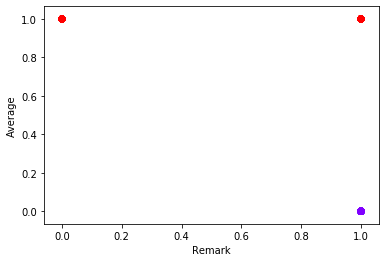

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import sklearn.metrics as metrics
import keras
#from tensorflow import tensorflow_estimator
from sklearn.cluster import KMeans
import keras
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import Imputer
import random as rd
import matplotlib.pyplot as plt

students=pd.read_csv("student-mat.csv")
#print(students)
students['internet']= students.internet.map({'yes':1,'no':0})
students['activities']= students.activities.map({'yes':1,'no':0})
students['famsup']= students.famsup.map({'yes':1,'no':0})
students['schoolsup']= students.schoolsup.map({'yes':1,'no':0})
students['Pstatus']= students.Pstatus.map({'T':1,'A':0})
students['paid']= students.paid.map({'yes':1,'no':0})
students['nursery']= students.nursery.map({'yes':1,'no':0})
students.drop(['school','sex','address','famsize','Mjob','Fjob','reason','guardian','higher'],axis=1,inplace=True)
#print(students['internet'])
students['average']=np.around((students['G1']+students['G2']+students['G3'])/3)
#students["average"].to_csv('student-mat.csv',mode='a',header=False)


for i in range(0,len(students['average'])):
    if(np.greater_equal(students['average'][i],7.0)):
        students.at[i,'remark']=1
    else:
        students.at[i,'remark']=0

#students_data  = students
#students.drop(['remark'],axis=1,inplace=True)
print(students.shape) 
print(students.head())
X = students['remark'].values.reshape(-1,1)
Y = students['average']
print(X)
print(Y)
#print(students)
num_clusters = 2
#print(students[['average','failures']])
#x_train = np.array(x_train).reshape(len(x_train), -1)
#y_predict = students[['age','average']]
#x = np.concatenate((x_train, x_test))
#y = np.concatenate((y_train, y_test))
x = Y.values.reshape((Y.values.shape[0], -1))
x = np.divide(x, 15.)

# 10 clusters
print(x)

# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=num_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(x)
print(y_pred_kmeans)
# Evaluate the K-Means clustering accuracy.
metrics.balanced_accuracy_score(X, y_pred_kmeans)
plt.scatter(X,y_pred_kmeans,c=kmeans.labels_, cmap='rainbow')
plt.ylabel('Average')
plt.xlabel('Remark')
plt.show()

In [8]:
students.isnull().any()

age           False
Pstatus       False
Medu          False
Fedu          False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
average       False
remark        False
dtype: bool